# Descriptive Analysis Using Python

In [1]:
import numpy as np
import pandas as pd
import statistics as st

data = pd.read_csv('subset_data.csv')#importing the csv file

data.set_index('title',inplace = True)#setting the axes to the title column so we only work with number values

#  Task 10 Continued

In [2]:
#subset of data with only the columns that we will be needing

df=data[['budget','revenue','runtime']]
df

,budget,revenue,runtime
title,,,
Avatar,237000000,2787965087,162.0
Titanic,200000000,1845034188,194.0
The Avengers,220000000,1519557910,143.0
Jurassic World,150000000,1513528810,124.0
Furious 7,190000000,1506249360,137.0
...,...,...,...
It's Complicated,85000000,219103655,121.0
Knocked Up,30000000,219076518,129.0
The Prince of Egypt,70000000,218613188,99.0


In [3]:
#Finding the mean median mode

#Declaring three lists to store calculated mean, median, and mode of 3 companies
Mean=[]
Median=[]
Mode=[]

#Iterating each column of dataframe
for col in df:
    Mean.append(df.loc[:,col].mean()) #calculating each column mean and stored within Mean named list
    Median.append(df.loc[:,col].median()) #calculating each column median and stored within Median named list
    Mode.append(st.mode(df[col])) #calculating each column mode and stored within Mode named list
    
row_head=['Mean','Median','Mode']
col_names=['Budget','Revenue','Runtime']

#Creating a new dataframe with all calculated mean, median, and mode of 3 companies
d_data=pd.DataFrame([Mean, Median, Mode],columns=col_names)

#Inserting a new column 'Measures' at the begining of the dataframe with 3 measures names
d_data.insert(0,"Measures", row_head, True)

display(d_data)

,Measures,Budget,Revenue,Runtime
0,Mean,103193736.0,4.585776e+08,118.72
1,Median,95000000.0,3.630016e+08,116.00
2,Mode,150000000.0,2.787965e+09,115.00


In [4]:
#finding the range in the Budget, Revenue and Runtime Column

maxBud = df['budget'].max()
minBud = df['budget'].min()

print(f'The max value in the Budget column is {maxBud}, and the min value in the Budget column is {minBud}')
print(f'The Range/difference is {maxBud-minBud}')
print()

maxRev = df['revenue'].max()
minRev = df['revenue'].min()

print(f'The max value in the Revenue column is {maxRev}, and the min value in the Revenue column is {minRev}')
print(f'The Range/difference is {maxRev-minRev}')
print()

maxRun = df['runtime'].max()
minRun = df['runtime'].min()

print(f'The max value in the Runtime column is {maxRun}, and the min value in the Runtime column is {minRun}')
print(f'The Range/difference is {maxRun-minRun}')
print()


#calculating the Range using a for loop:
print("Finding the range using a for loop:")
Min=[]
Max=[]
RangeList=[]
for i in df:
    col_max=df.loc[:,i].max()
    col_min=df.loc[:,i].min()
    col_r = col_max - col_min
    RangeList.append(col_r)
    print(f'the range of the {i} column is {col_r}')


The max value in the Budget column is 380000000, and the min value in the Budget column is 60000
The Range/difference is 379940000

The max value in the Revenue column is 2787965087, and the min value in the Revenue column is 217764291
The Range/difference is 2570200796

The max value in the Runtime column is 238.0, and the min value in the Runtime column is 70.0
The Range/difference is 168.0

Finding the range using a for loop:
the range of the budget column is 379940000
the range of the revenue column is 2570200796
the range of the runtime column is 168.0


In [5]:
#Calculating Standard Deviation and Coefficient of Variation
Mean=[]
SD=[]
CV=[]

#Iterating each column of dataframe
for col in df:
    col_mean=df.loc[:,col].mean() #calculating each column mean
    Mean.append(col_mean) #storing within Mean named list
    col_sd=df.loc[:,col].std() #calculating each column standard deviation
    SD.append(col_sd) #storing within SD named list
    CV.append(col_sd/col_mean*100)  #calculating each column coefficient of variation and stored within CV named list


row_head =['Mean','Median','Mode','Standard Deviation','Coefficient of Variation']
col_names=['Budget','Revenue','Runtime']

#Creating a new dataframe with all calculated mean, standard deviation and coefficient of variation of 3 companies
new_df=pd.DataFrame([Mean,Median,Mode, SD, CV],columns=col_names)

#Inserting a new column 'Measures' at begining of the dataframe with 3 measures names
new_df.insert(0, "Measures", row_head, True)

pd.set_option('display.float_format', lambda x: '%.2f' % x)#changes from scientific notation to full number

#pd.reset_option('display.float_format') #resets back to scientific notation

display(new_df)

,Measures,Budget,Revenue,Runtime
0,Mean,103193736.00,458577595.06,118.72
1,Median,95000000.00,363001569.50,116.00
2,Mode,150000000.00,2787965087.00,115.00
3,Standard Deviation,62248934.08,268535695.30,23.26
4,Coefficient of Variation,60.32,58.56,19.59


In [6]:
#finding the Inter Quartile Range (IQR)

#Iterating each column of dataframe
for x in df:
    LO=[]#Lower Outliers list
    UO=[]#Upper Outliers list
    movie_series = pd.Series(df[x]) #Converting each column values into pandas series
    
    Min1=min(movie_series) #Calculating minimum value
    Max1=max(movie_series) #Calculating maximum value
    Range=Max1-Min1 #Calculating range
    
    Q1=movie_series.quantile(0.25) #Calculating quartile 1
    Q3=movie_series.quantile(0.75) #Calculating quartile 3
    IQR=Q3-Q1 #Calculating inter quartile range
    UF=Q3+1.5*IQR #Calculating upper fence
    LF=Q1-1.5*IQR #Calculating lower fence
    
    # The rule of 1.5 * IQR 
    # (IQR*1.5) = k 
    # Any point beyond Q3+k is an outlier 
    # Any point beyond Q1-k is an outlier 
    
    for i in df[x]: #this is iterating down the list of each column 
        if(i<LF):
            LO.append(i)
        if(i>UF):
            UO.append(i)
    
    #Storing all above the calculated minimum, maximum, range, Q1, Q3, IQR, 
    #upper fence, lower fence, and outliers into respective lists
    if(x=="budget"):
        Budget=['Budget',Min1, Max1, Range, Q1, Q3, IQR, LF, UF,[LO,UO]]
    elif(x=="revenue"):
        Revenue=['Revenue',Min1, Max1, Range, Q1, Q3, IQR, LF, UF,[LO,UO]]
    else:
        Runtime=['Runtime',Min1, Max1, Range, Q1, Q3, IQR, LF, UF,[LO,UO]] 
        
col_names=['Company','Min','Max','Range','Q1','Q3','IQR','Lower Fence', 'Upper Fence','Outliers']
#Creating a new dataframe with all calculated values of 3 companies
d_data=pd.DataFrame([Budget, Revenue, Runtime],columns=col_names,) 

d_data.set_index('Company',inplace = True)
display(d_data)

,Min,Max,Range,Q1,Q3,IQR,Lower Fence,Upper Fence,Outliers
Company,,,,,,,,,
Budget,60000.00,380000000.00,379940000.00,55000000.00,150000000.00,95000000.00,-87500000.00,292500000.00,"[[], [380000000, 300000000]]"
Revenue,217764291.00,2787965087.00,2570200796.00,281447346.25,547133157.50,265685811.25,-117081370.62,945661874.38,"[[], [2787965087, 1845034188, 1519557910, 1513..."
Runtime,70.00,238.00,168.00,100.00,132.00,32.00,52.00,180.00,"[[], [194.0, 201.0, 187.0, 183.0, 181.0, 238.0..."


In [7]:
#Attempting to do the above task a different way

temp =df.quantile([0.25,0.75]) #calculating 1 and 3rd quartiles.

q1p2 = [] #q1 list
q3p2 = [] #q3 list
IQR2 = [] #IQR list
LowerF = [] #lower fence list
UpperF = [] #upper fence list
uout = [] #outlier list
lout = [] #outlier list
var = 0

for y in temp:
    q1 = temp.iloc[0,var] #iterating through the first row 
    q1p2.append(q1) #stores the value in a list
    q3 = temp.iloc[1,var] #iterating through the second row
    q3p2.append(q3) #stores the value in a list
    IQR = q3 - q1 #caluclating the IQR which is the 3rd quartile - 1st quartile
    IQR2.append(IQR) #stores the value in a list
    lower = q1-(1.5*IQR) #calculating the lower fence(formula: q1-(1.5*IQR))
    LowerF.append(lower) #stores the value in a list
    upper = q3+(1.5*IQR) #calculating the upper fence(formula: q3+(1.5*IQR))
    UpperF.append(upper) #stores the value in a list
    var += 1

temp = temp.set_axis([0, 1])#resetting the axis

#adding the lists to the existing dataframe
temp.loc[len(temp)] = IQR2
temp.loc[len(temp)] = RangeList
temp.loc[len(temp)] = UpperF
temp.loc[len(temp)] = LowerF

#adding new index axis labels
temp = temp.set_axis(['Q1', 'Q3','IQR','Range','Upper Fence','Lower Fence'])

#adding index title
temp.index.name = 'Measures'

display(temp)


,budget,revenue,runtime
Measures,,,
Q1,55000000.00,281447346.25,100.00
Q3,150000000.00,547133157.50,132.00
IQR,95000000.00,265685811.25,32.00
Range,379940000.00,2570200796.00,168.00
Upper Fence,292500000.00,945661874.38,180.00
Lower Fence,-87500000.00,-117081370.62,52.00


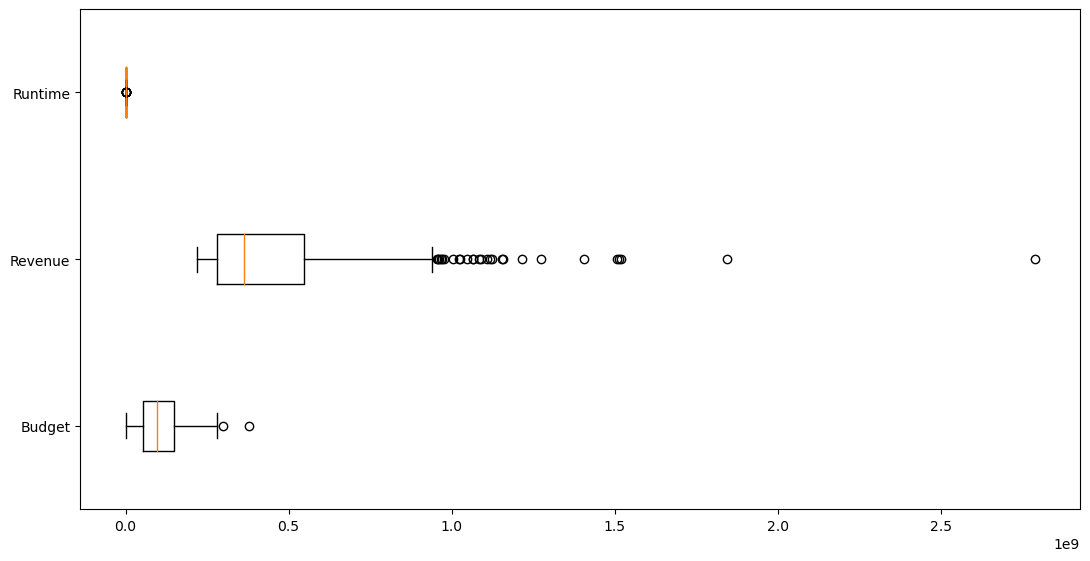

In [8]:
import matplotlib.pyplot as plt

#Creating a box plot that shows outliers

#Separting each company's salary in different list
bud_column=df['budget'].tolist()
rev_column=df['revenue'].tolist()
run_column=df['runtime'].tolist()

#Setting figure size
fig = plt.figure(figsize =(10, 5))

# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

#Creating boxplots of 3 groups of salaries
plt.boxplot([bud_column,rev_column,run_column],vert=0)

#Setting y-axis label
ax.set_yticklabels(['Budget', 'Revenue','Runtime'])

#Showing the final plot
plt.show()

The runtime column seems to have a similar length which is understandable since many movies are 60min to 2 hrs long

The Revenue column seems to have a lot of outliers

The Budget column seems to have very few outliers

# Task 11
Display the names of the movies along with their runtimes for those movies that have above average runtime. 

In [10]:
display(new_df[:1]) #The mean of the 3 columns

print(f'The mean of the runtime column is {new_df.iloc[0][3]}') #pulling the specific value of the runtime mean

average_runtime = df[(df.runtime>118.72)] #filtering the dataframe for movies that have a runtime longer than 118 minutes

display(average_runtime.sort_values(by = 'runtime', ascending = False)) #sorting and printing

print(f'There are 234 rows of movies that are over 118 minutes')

,Measures,Budget,Revenue,Runtime
0,Mean,103193736.00,458577595.06,118.72


The mean of the runtime column is 118.72


,budget,revenue,runtime
title,,,
Gone with the Wind,4000000,400176459,238.00
The Lord of the Rings: The Return of the King,94000000,1118888979,201.00
Schindler's List,22000000,321365567,195.00
Titanic,200000000,1845034188,194.00
The Green Mile,60000000,284600000,189.00
...,...,...,...
Pretty Woman,14000000,463000000,119.00
Tomorrow Never Dies,110000000,333011068,119.00
Fatal Attraction,14000000,320145693,119.00


There are 234 rows of movies that are over 118 minutes
